# Figures & Tables: Time Series Analysis

## Online Appendix of "International News Coverage and Foreign Image Building"

### Gento Kato (Nov. 4, 2017)

*Back to [Summary Page](v3_SummaryNotebook.ipynb)*

In [1]:
#################################################################################
## File Name: v3_Figures_TimeSeries.R                                          ##
## Creation Date: 4 Nov 2017                                                   ##
## Author: Gento Kato                                                          ##
## Project: Foreign Image News Project                                         ##
## Purpose: Visualize Result of Time Series Analysis                           ##
#################################################################################

## For Jupyter Notebook (Ignore if Using Other Software) ##
library(IRdisplay)

display_html(
'<script>  
code_show=true; 
function code_toggle() {
  if (code_show){
    $(\'div.input\').hide();
  } else {
    $(\'div.input\').show();
  }
  code_show = !code_show
}  
$( document ).ready(code_toggle);
</script>
  <form action="javascript:code_toggle()">
    <input type="submit" value="Click here to toggle on/off the raw code.">
 </form>'
)

## Suppress Warning
options(warn=-1)
#options(warn=0) # put it back


### 1. Load Packages & Set Directory

In [2]:
################
## Preparation ##
#################

## Clear Workspace
rm(list=ls())

## Library Required Packages
library(rprojroot);
library(knitr);library(ggplot2);library(gridExtra);library(grid);library(xtable)
source("C:/GoogleDrive/Stat_Soft_Helps/R/Packages/ggplot2/multiplot.R")

## Set Working Directory (Automatically or Manually) ##
#setwd(dirname(rstudioapi::getActiveDocumentContext()$path)); setwd("../") #In RStudio
projdir <- find_root(has_file("README.md")); projdir; setwd(projdir) #In Atom
#setwd("C:/GoogleDrive/Projects/Agenda-Setting Persuasion Framing/Foreign_Image_News_Project/codes")



Attaching package: 'xtable'

The following object is masked from 'package:IRdisplay':

    display



[1] "C:/GoogleDrive/Projects/Agenda-Setting Persuasion Framing/Foreign_Image_News_Project"

### 2. Import Data

In [3]:
## Load The Headline Subset Data ##
load("data/v3_Data5_MonthlySubset.Rdata")
## Load The Results of Time-Series Analysis ##
load("outputs/v3_Analysis_TimeSeries.Rdata")


### 3. Plot Descriptives

In [4]:
## ggplot2 Theme Setting
gktheme <-
  theme(axis.text=element_text(size=10, colour="black"),
        axis.title.x=element_text(size=12,face="bold", vjust=-1.5),
        axis.title.y=element_text(size=12,face="bold", vjust=1.5),
        plot.title=element_text(size=13,face="bold", vjust=2, hjust=0.5),
        plot.margin = unit(c(0.5,0.5,0.5,0.5), "cm"),
        panel.grid.major = element_line(colour = "grey90"),
        panel.grid.minor = element_line(colour = "grey90"),
        panel.background = element_rect(fill=NA, colour="black",
                                        size=0.5, linetype=1),
        legend.background = element_rect(fill=NA),
        legend.key = element_rect(fill="transparent",colour=NA))


#### 3.1 Importance Perception

In [5]:
#######################
## Plot Descriptives ##
#######################

## Average Level of Importance ##
imprel_us_median<-median(jijidata$imprel_us,na.rm=TRUE)
imprel_chn_median<-median(jijidata$imprel_china,na.rm=TRUE)
imprel_seasia_median<-median(jijidata$imprel_seasia,na.rm=TRUE)
imprel_skor_median<-median(jijidata$imprel_skorea,na.rm=TRUE)
imprel_euro_median<-median(jijidata$imprel_europe,na.rm=TRUE)
imprel_rus_median<-median(jijidata$imprel_rus,na.rm=TRUE)
imprel_nkor_median<-median(jijidata$imprel_nkorea,na.rm=TRUE)
imprel_mneast_median<-median(jijidata$imprel_mneast,na.rm=TRUE)
imprel_taiwan_median<-median(jijidata$imprel_taiwan,na.rm=TRUE)
imprel_msamerica_median<-median(jijidata$imprel_csamerica,na.rm=TRUE)
imprel_africa_median<-median(jijidata$imprel_africa,na.rm=TRUE)
imprel_oceania_median<-median(jijidata$imprel_oceania,na.rm=TRUE)

imprelmed <- rbind(imprel_us_median,imprel_chn_median, imprel_seasia_median, imprel_skor_median,
      imprel_euro_median, imprel_rus_median, imprel_nkor_median, imprel_mneast_median,
      imprel_taiwan_median, imprel_msamerica_median, imprel_africa_median, imprel_oceania_median)
rownames(imprelmed) <- c("US","China","SE Asia", "S.Korea", "Europe", "Russia", "N.Korea", "MN East",
                         "Taiwan", "CS America", "Africa", "Oceania")

cat("Median Proportions of Importance Perception")
imprelmed


Median Proportions of Importance Perception

US,63.50
China,61.35
SE Asia,23.45
S.Korea,20.85
Europe,13.20
Russia,9.85
N.Korea,8.15
MN East,5.30
Taiwan,5.10
CS America,2.00
Africa,1.50


In [6]:

time<-rep(seq(1:329),12)
impreldata<-data.frame(time)
impreldata$id<-c(rep(1,329),rep(2,329),rep(3,329),rep(4,329),
                 rep(5,329),rep(6,329),rep(7,329),rep(8,329),
                 rep(9,329),rep(10,329),rep(11,329),rep(12,329))
impreldata$imprel<-c(jijidata$imprel_us,
                         jijidata$imprel_china,
                         jijidata$imprel_seasia,
                         jijidata$imprel_skor,
                         jijidata$imprel_euro,
                         jijidata$imprel_rus,
                         jijidata$imprel_nkor,
                         jijidata$imprel_mneast,
                         jijidata$imprel_taiwan,
                         jijidata$imprel_csamerica,
                         jijidata$imprel_africa,
                         jijidata$imprel_oceania)
impreldata$statecount_w_both_per<-c(usmonth$statecount_w_both_per,
     chnmonth$statecount_w_both_per,
     seasiamonth$statecount_w_both_per,
     skormonth$statecount_w_both_per,
     euromonth$statecount_w_both_per,
     rusmonth$statecount_w_both_per,
     nkormonth$statecount_w_both_per,
     mneastmonth$statecount_w_both_per,
     taiwanmonth$statecount_w_both_per,
     msamericamonth$statecount_w_both_per,
     africamonth$statecount_w_both_per,
     oceaniamonth$statecount_w_both_per)

impreldatax<-impreldata[impreldata$time>=90,]


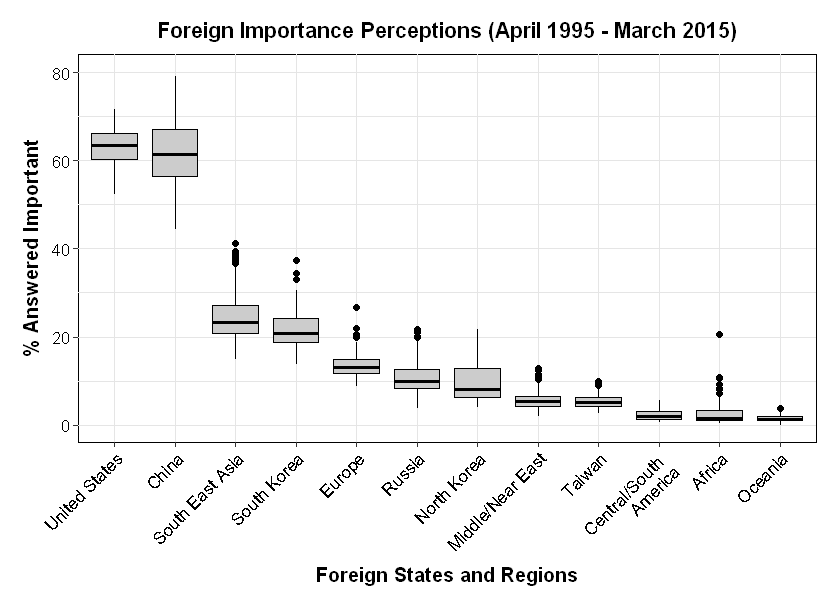

In [7]:
p1<- ggplot(impreldatax, aes(as.factor(id),imprel)) + gktheme +
  theme(axis.text.x=element_text(angle=45,hjust=1))+
  geom_boxplot(colour="black",fill="grey80",lwd=0.5)+
  scale_y_continuous(limits=c(0,80),breaks=c(0,20,40,60,80)) +
  scale_x_discrete(labels=c("United States","China","South East Asia",
                            "South Korea","Europe","Russia","North Korea",
                            "Middle/Near East","Taiwan",
                            "Central/South \nAmerica","Africa","Oceania"))+
  xlab("Foreign States and Regions") + ylab("% Answered Important") +
  ggtitle("Foreign Importance Perceptions (April 1995 - March 2015)")

options(repr.plot.width=7, repr.plot.height=5)
p1

#### 3.2 Total Coverage (TC)

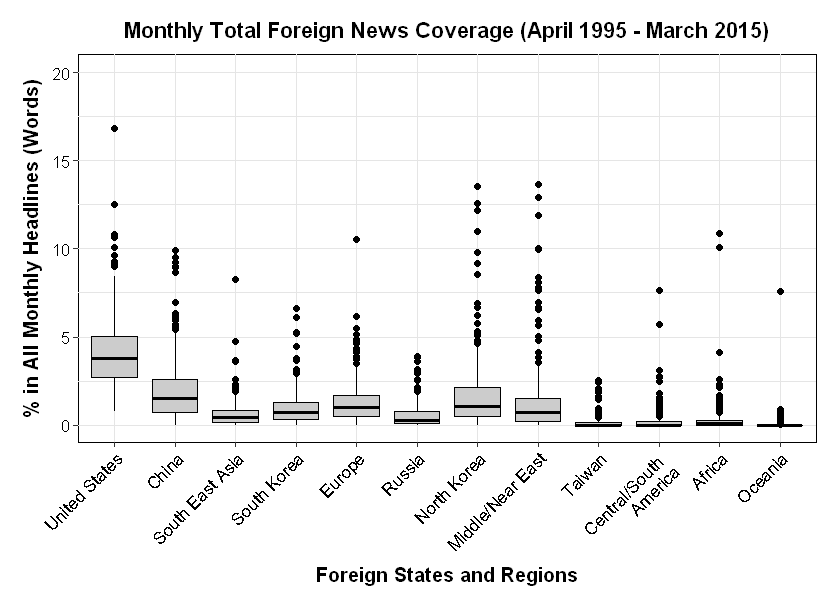

In [8]:
p2<- ggplot(impreldatax, aes(as.factor(id),statecount_w_both_per)) + gktheme +
  theme(axis.text.x=element_text(angle=45,hjust=1))+
  geom_boxplot(colour="black",fill="grey80",lwd=0.5)+
  scale_y_continuous(limits=c(0,20),breaks=c(0,5,10,15,20)) +
  scale_x_discrete(labels=c("United States","China","South East Asia",
                            "South Korea","Europe","Russia","North Korea",
                            "Middle/Near East","Taiwan",
                            "Central/South \nAmerica","Africa","Oceania"))+
  xlab("Foreign States and Regions") + ylab("% in All Monthly Headlines (Words)") +
  ggtitle("Monthly Total Foreign News Coverage (April 1995 - March 2015)")

options(repr.plot.width=7, repr.plot.height=5)
p2


#### 3.3 Favorability Perception

In [9]:
## Favorability ##

time<-rep(seq(1:329),4)
ldldata<-data.frame(time)
ldldata$id<-c(rep(1,329),rep(2,329),rep(3,329),rep(4,329))
ldldata$ldl<-c(usmonth$ldlstate,
               chnmonth$ldlstate,
               skormonth$ldlstate,
               nkormonth$ldlstate)


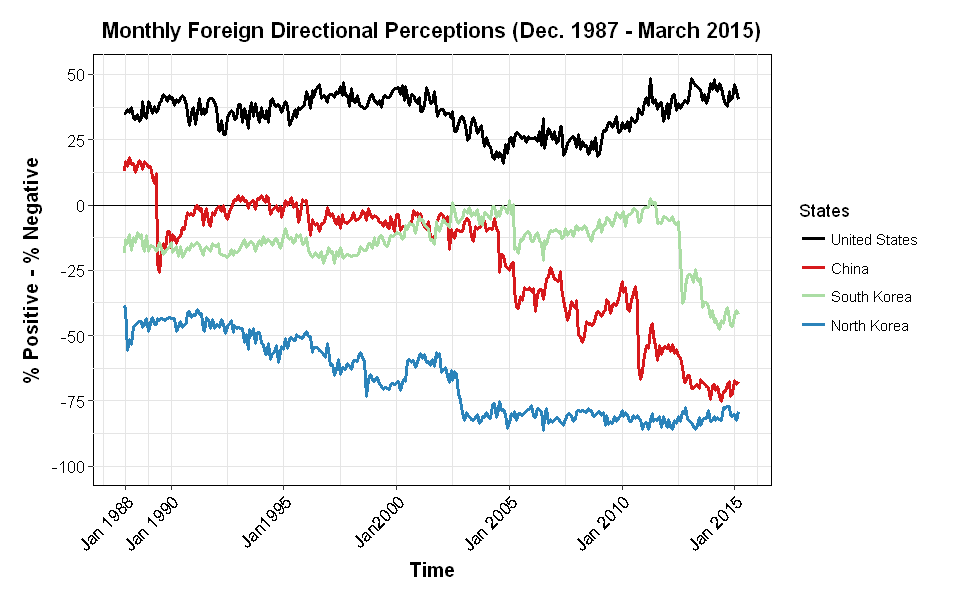

In [10]:
p3<-ggplot()+gktheme+
  theme(axis.text.x=element_text(angle=45,hjust=1))+
  geom_abline(slope=0,intercept=0)+
  geom_line(data=usmonth,aes(time,ldlstate,color="1"),lwd=1,linetype=1)+
  geom_line(data=chnmonth,aes(time,ldlstate,colour="2"),lwd=1,linetype=1)+
  geom_line(data=skormonth,aes(time,ldlstate,colour="3"),lwd=1,linetype=1)+
  geom_line(data=nkormonth,aes(time,ldlstate,colour="4"),lwd=1,linetype=1)+
  scale_y_continuous(limits=c((-100),50),breaks=c(-100,-75,-50,-25,0,25,50))+
  scale_x_continuous(limits=c(1,329),breaks=c(2,26,86,146,206,266,326),
                     labels=c("Jan 1988","Jan 1990","Jan1995","Jan2000",
                              "Jan 2005","Jan 2010","Jan 2015"))+
  xlab("Time") + ylab("% Positive - % Negative") +
  ggtitle("Monthly Foreign Directional Perceptions (Dec. 1987 - March 2015)")+
  scale_colour_manual(name = 'States',
                      values =c("1"='black',"2"='#d7191c',"3"='#abdda4',"4"='#2b83ba'),
                      labels = c('United States','China','South Korea','North Korea'))

options(repr.plot.width=8, repr.plot.height=5)
p3


#### 3.5 Positive/Negative Tones of Coverage (PNC)

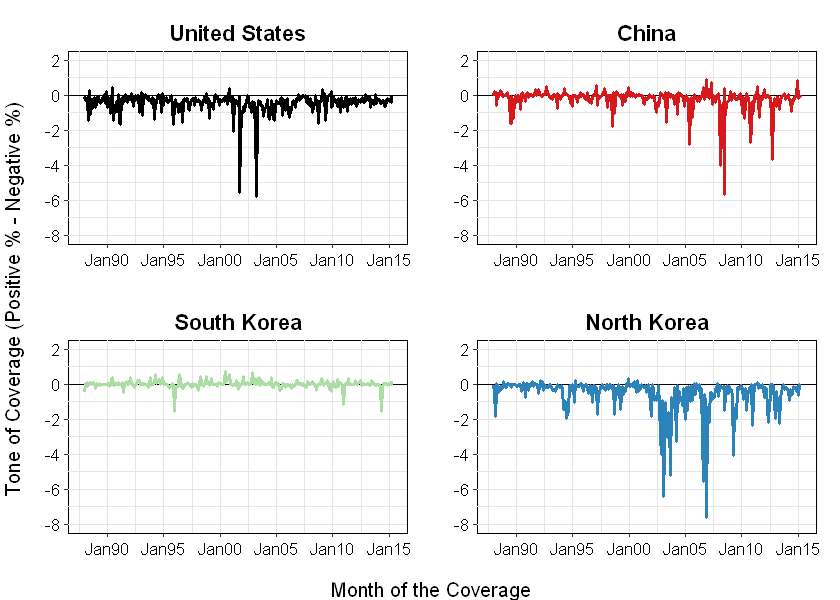

In [11]:
##############################
## Frequency of PN Coverage ##
##############################

p31<-ggplot()+gktheme+
  theme(axis.text.x=element_text(angle=0,hjust=0.5))+
  geom_abline(slope=0,intercept=0)+
  geom_line(data=usmonth,aes(time,statetone_w_both_per2),colour='black',lwd=1,linetype=1)+
  scale_y_continuous(limits=c(-8,2),breaks=c(-8,-6,-4,-2,0,2))+
  scale_x_continuous(limits=c(1,329),breaks=c(26,86,146,206,266,326),
                     labels=c("Jan90","Jan95","Jan00","Jan05","Jan10","Jan15"))+
  xlab(NULL) + ylab(NULL) +
  ggtitle("United States")

p32<-ggplot()+gktheme+
  theme(axis.text.x=element_text(angle=0,hjust=0.5))+
  geom_abline(slope=0,intercept=0)+
  geom_line(data=chnmonth,aes(time,statetone_w_both_per2),colour='#d7191c',lwd=1,linetype=1)+
  scale_y_continuous(limits=c(-8,2),breaks=c(-8,-6,-4,-2,0,2))+
  scale_x_continuous(limits=c(1,329),breaks=c(26,86,146,206,266,326),
                     labels=c("Jan90","Jan95","Jan00","Jan05","Jan10","Jan15"))+
  xlab(NULL) + ylab(NULL) +
  ggtitle("China")

p33<-ggplot()+gktheme+
  theme(axis.text.x=element_text(angle=0,hjust=0.5))+
  geom_abline(slope=0,intercept=0)+
  geom_line(data=skormonth,aes(time,statetone_w_both_per2),colour='#abdda4',lwd=1,linetype=1)+
  scale_y_continuous(limits=c(-8,2),breaks=c(-8,-6,-4,-2,0,2))+
  scale_x_continuous(limits=c(1,329),breaks=c(26,86,146,206,266,326),
                     labels=c("Jan90","Jan95","Jan00","Jan05","Jan10","Jan15"))+
  xlab(NULL) + ylab(NULL) +
  ggtitle("South Korea")

p34<-ggplot()+gktheme+
  theme(axis.text.x=element_text(angle=0,hjust=0.5))+
  geom_abline(slope=0,intercept=0)+
  geom_line(data=nkormonth,aes(time,statetone_w_both_per2),colour='#2b83ba',lwd=1,linetype=1)+
  scale_y_continuous(limits=c(-8,2),breaks=c(-8,-6,-4,-2,0,2))+
  scale_x_continuous(limits=c(1,329),breaks=c(26,86,146,206,266,326),
                     labels=c("Jan90","Jan95","Jan00","Jan05","Jan10","Jan15"))+
  xlab(NULL) + ylab(NULL) +
  ggtitle("North Korea")

p31to4<-arrangeGrob(p31,p32,p33,p34,ncol=2,nrow=2,
                   left="Tone of Coverage (Positive % - Negative %)",
                   bottom="Month of the Coverage")

options(repr.plot.width=7, repr.plot.height=5)
grid.arrange(p31to4)


#### 3.6 Framed TC

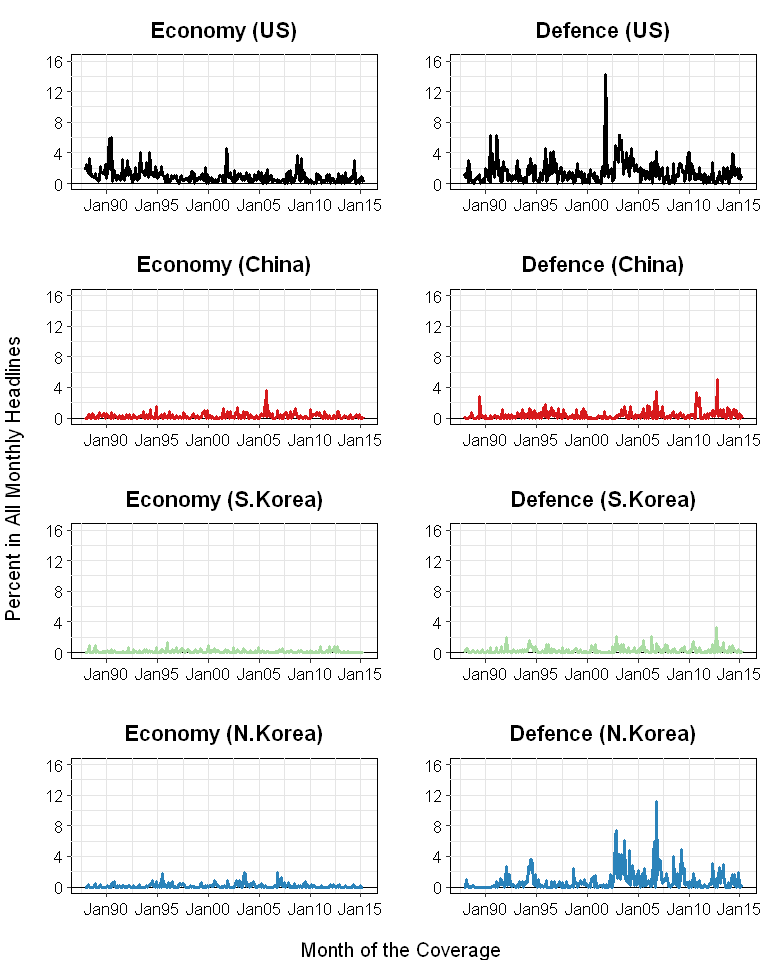

In [12]:
########################
## Frequency of Frame ##
########################

p4a<-ggplot()+gktheme+
  theme(axis.text.x=element_text(angle=0,hjust=0.5))+
  geom_abline(slope=0,intercept=0)+
  geom_line(data=usmonth,aes(time,econ_w_both_per2),colour='black',lwd=1,linetype=1)+
  scale_y_continuous(limits=c(0,16),breaks=c(0,4,8,12,16))+
  scale_x_continuous(limits=c(1,329),breaks=c(26,86,146,206,266,326),
                     labels=c("Jan90","Jan95","Jan00","Jan05","Jan10","Jan15"))+
  xlab(NULL) + ylab(NULL) +
  ggtitle("Economy (US)")
p4b<-ggplot()+gktheme+
  theme(axis.text.x=element_text(angle=0,hjust=0.5))+
  geom_abline(slope=0,intercept=0)+
  geom_line(data=usmonth,aes(time,defense_w_both_per2),colour='black',lwd=1,linetype=1)+
  scale_y_continuous(limits=c(0,16),breaks=c(0,4,8,12,16))+
  scale_x_continuous(limits=c(1,329),breaks=c(26,86,146,206,266,326),
                     labels=c("Jan90","Jan95","Jan00","Jan05","Jan10","Jan15"))+
  xlab(NULL) + ylab(NULL) +
  ggtitle("Defence (US)")

p5a<-ggplot()+gktheme+
  theme(axis.text.x=element_text(angle=0,hjust=0.5))+
  geom_abline(slope=0,intercept=0)+
  geom_line(data=chnmonth,aes(time,econ_w_both_per2),colour='#d7191c',lwd=1,linetype=1)+
  scale_y_continuous(limits=c(0,16),breaks=c(0,4,8,12,16))+
  scale_x_continuous(limits=c(1,329),breaks=c(26,86,146,206,266,326),
                     labels=c("Jan90","Jan95","Jan00","Jan05","Jan10","Jan15"))+
  xlab(NULL) + ylab(NULL) +
  ggtitle("Economy (China)")
p5b<-ggplot()+gktheme+
  theme(axis.text.x=element_text(angle=0,hjust=0.5))+
  geom_abline(slope=0,intercept=0)+
  geom_line(data=chnmonth,aes(time,defense_w_both_per2),colour='#d7191c',lwd=1,linetype=1)+
  scale_y_continuous(limits=c(0,16),breaks=c(0,4,8,12,16))+
  scale_x_continuous(limits=c(1,329),breaks=c(26,86,146,206,266,326),
                     labels=c("Jan90","Jan95","Jan00","Jan05","Jan10","Jan15"))+
  xlab(NULL) + ylab(NULL) +
  ggtitle("Defence (China)")

p6a<-ggplot()+gktheme+
  theme(axis.text.x=element_text(angle=0,hjust=0.5))+
  geom_abline(slope=0,intercept=0)+
  geom_line(data=skormonth,aes(time,econ_w_both_per2),colour='#abdda4',lwd=1,linetype=1)+
  scale_y_continuous(limits=c(0,16),breaks=c(0,4,8,12,16))+
  scale_x_continuous(limits=c(1,329),breaks=c(26,86,146,206,266,326),
                     labels=c("Jan90","Jan95","Jan00","Jan05","Jan10","Jan15"))+
  xlab(NULL) + ylab(NULL) +
  ggtitle("Economy (S.Korea)")
p6b<-ggplot()+gktheme+
  theme(axis.text.x=element_text(angle=0,hjust=0.5))+
  geom_abline(slope=0,intercept=0)+
  geom_line(data=skormonth,aes(time,defense_w_both_per2),colour='#abdda4',lwd=1,linetype=1)+
  scale_y_continuous(limits=c(0,16),breaks=c(0,4,8,12,16))+
  scale_x_continuous(limits=c(1,329),breaks=c(26,86,146,206,266,326),
                     labels=c("Jan90","Jan95","Jan00","Jan05","Jan10","Jan15"))+
  xlab(NULL) + ylab(NULL) +
  ggtitle("Defence (S.Korea)")

p7a<-ggplot()+gktheme+
  theme(axis.text.x=element_text(angle=0,hjust=0.5))+
  geom_abline(slope=0,intercept=0)+
  geom_line(data=nkormonth,aes(time,econ_w_both_per2),colour='#2b83ba',lwd=1,linetype=1)+
  scale_y_continuous(limits=c(0,16),breaks=c(0,4,8,12,16))+
  scale_x_continuous(limits=c(1,329),breaks=c(26,86,146,206,266,326),
                     labels=c("Jan90","Jan95","Jan00","Jan05","Jan10","Jan15"))+
  xlab(NULL) + ylab(NULL) +
  ggtitle("Economy (N.Korea)")
p7b<-ggplot()+gktheme+
  theme(axis.text.x=element_text(angle=0,hjust=0.5))+
  geom_abline(slope=0,intercept=0)+
  geom_line(data=nkormonth,aes(time,defense_w_both_per2),colour='#2b83ba',lwd=1,linetype=1)+
  scale_y_continuous(limits=c(0,16),breaks=c(0,4,8,12,16))+
  scale_x_continuous(limits=c(1,329),breaks=c(26,86,146,206,266,326),
                     labels=c("Jan90","Jan95","Jan00","Jan05","Jan10","Jan15"))+
  xlab(NULL) + ylab(NULL) +
  ggtitle("Defence (N.Korea)")

p4to7<-arrangeGrob(p4a,p4b,p5a,p5b,p6a,p6b,p7a,p7b,ncol=2,nrow=4,
             left="Percent in All Monthly Headlines",
             bottom="Month of the Coverage")

options(repr.plot.width=6.5, repr.plot.height=8)
grid.arrange(p4to7)


#### 3.7 Framed PNC

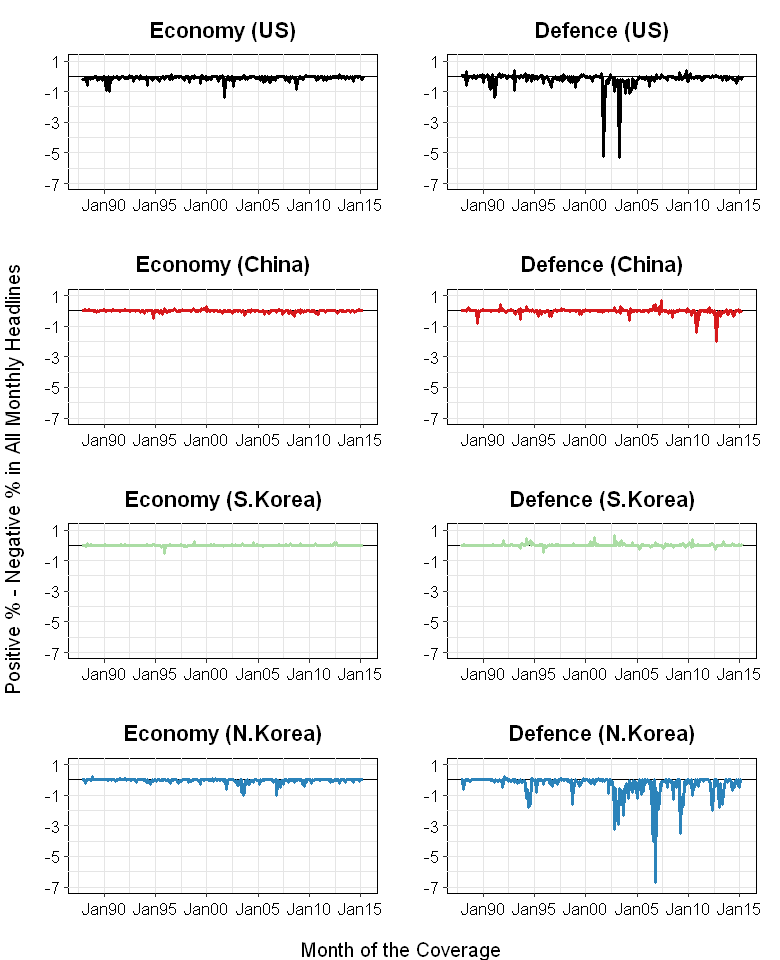

In [13]:
################
## Framed PNC ##
################

p41a<-ggplot()+gktheme+
  theme(axis.text.x=element_text(angle=0,hjust=0.5))+
  geom_abline(slope=0,intercept=0)+
  geom_line(data=usmonth,aes(time,toneecon_w_both_per2),colour='black',lwd=1,linetype=1)+
  scale_y_continuous(limits=c(-7,1),breaks=c(-7,-5,-3,-1,1))+
  scale_x_continuous(limits=c(1,329),breaks=c(26,86,146,206,266,326),
                     labels=c("Jan90","Jan95","Jan00","Jan05","Jan10","Jan15"))+
  xlab(NULL) + ylab(NULL) +
  ggtitle("Economy (US)")
p41b<-ggplot()+gktheme+
  theme(axis.text.x=element_text(angle=0,hjust=0.5))+
  geom_abline(slope=0,intercept=0)+
  geom_line(data=usmonth,aes(time,tonedefense_w_both_per2),colour='black',lwd=1,linetype=1)+
  scale_y_continuous(limits=c(-7,1),breaks=c(-7,-5,-3,-1,1))+
  scale_x_continuous(limits=c(1,329),breaks=c(26,86,146,206,266,326),
                     labels=c("Jan90","Jan95","Jan00","Jan05","Jan10","Jan15"))+
  xlab(NULL) + ylab(NULL) +
  ggtitle("Defence (US)")

p51a<-ggplot()+gktheme+
  theme(axis.text.x=element_text(angle=0,hjust=0.5))+
  geom_abline(slope=0,intercept=0)+
  geom_line(data=chnmonth,aes(time,toneecon_w_both_per2),colour='#d7191c',lwd=1,linetype=1)+
  scale_y_continuous(limits=c(-7,1),breaks=c(-7,-5,-3,-1,1))+
  scale_x_continuous(limits=c(1,329),breaks=c(26,86,146,206,266,326),
                     labels=c("Jan90","Jan95","Jan00","Jan05","Jan10","Jan15"))+
  xlab(NULL) + ylab(NULL) +
  ggtitle("Economy (China)")
p51b<-ggplot()+gktheme+
  theme(axis.text.x=element_text(angle=0,hjust=0.5))+
  geom_abline(slope=0,intercept=0)+
  geom_line(data=chnmonth,aes(time,tonedefense_w_both_per2),colour='#d7191c',lwd=1,linetype=1)+
  scale_y_continuous(limits=c(-7,1),breaks=c(-7,-5,-3,-1,1))+
  scale_x_continuous(limits=c(1,329),breaks=c(26,86,146,206,266,326),
                     labels=c("Jan90","Jan95","Jan00","Jan05","Jan10","Jan15"))+
  xlab(NULL) + ylab(NULL) +
  ggtitle("Defence (China)")

p61a<-ggplot()+gktheme+
  theme(axis.text.x=element_text(angle=0,hjust=0.5))+
  geom_abline(slope=0,intercept=0)+
  geom_line(data=skormonth,aes(time,toneecon_w_both_per2),colour='#abdda4',lwd=1,linetype=1)+
  scale_y_continuous(limits=c(-7,1),breaks=c(-7,-5,-3,-1,1))+
  scale_x_continuous(limits=c(1,329),breaks=c(26,86,146,206,266,326),
                     labels=c("Jan90","Jan95","Jan00","Jan05","Jan10","Jan15"))+
  xlab(NULL) + ylab(NULL) +
  ggtitle("Economy (S.Korea)")
p61b<-ggplot()+gktheme+
  theme(axis.text.x=element_text(angle=0,hjust=0.5))+
  geom_abline(slope=0,intercept=0)+
  geom_line(data=skormonth,aes(time,tonedefense_w_both_per2),colour='#abdda4',lwd=1,linetype=1)+
  scale_y_continuous(limits=c(-7,1),breaks=c(-7,-5,-3,-1,1))+
  scale_x_continuous(limits=c(1,329),breaks=c(26,86,146,206,266,326),
                     labels=c("Jan90","Jan95","Jan00","Jan05","Jan10","Jan15"))+
  xlab(NULL) + ylab(NULL) +
  ggtitle("Defence (S.Korea)")

p71a<-ggplot()+gktheme+
  theme(axis.text.x=element_text(angle=0,hjust=0.5))+
  geom_abline(slope=0,intercept=0)+
  geom_line(data=nkormonth,aes(time,toneecon_w_both_per2),colour='#2b83ba',lwd=1,linetype=1)+
  scale_y_continuous(limits=c(-7,1),breaks=c(-7,-5,-3,-1,1))+
  scale_x_continuous(limits=c(1,329),breaks=c(26,86,146,206,266,326),
                     labels=c("Jan90","Jan95","Jan00","Jan05","Jan10","Jan15"))+
  xlab(NULL) + ylab(NULL) +
  ggtitle("Economy (N.Korea)")
p71b<-ggplot()+gktheme+
  theme(axis.text.x=element_text(angle=0,hjust=0.5))+
  geom_abline(slope=0,intercept=0)+
  geom_line(data=nkormonth,aes(time,tonedefense_w_both_per2),colour='#2b83ba',lwd=1,linetype=1)+
  scale_y_continuous(limits=c(-7,1),breaks=c(-7,-5,-3,-1,1))+
  scale_x_continuous(limits=c(1,329),breaks=c(26,86,146,206,266,326),
                     labels=c("Jan90","Jan95","Jan00","Jan05","Jan10","Jan15"))+
  xlab(NULL) + ylab(NULL) +
  ggtitle("Defence (N.Korea)")

p41to71<-arrangeGrob(p41a,p41b,p51a,p51b,p61a,p61b,p71a,p71b,ncol=2,nrow=4,
             left="Positive % - Negative % in All Monthly Headlines",
             bottom="Month of the Coverage")

options(repr.plot.width=6.5, repr.plot.height=8)
grid.arrange(p41to71)


### 4. Plot IRF Results 

In [14]:
#################################
## Function to Plot IRF Result ##
#################################

pirf <- function(orgdt,dv,iv,irfdt,nv,title,std=FALSE){
  stdiv<-sd(orgdt[,iv])
  stddv<-sd(orgdt[,dv])
  if (!std) {
    stdiv <- 1
    stddv <- 1
  }
  time<-seq(0:12)
  data<-data.frame(time)
  data$time<-data$time-1
  data$impulse<-(irfdt[[1]][[iv]][,nv]*stddv)/stdiv
  data$downci<-(irfdt[[2]][[iv]][,nv]*stddv)/stdiv
  data$upci<-(irfdt[[3]][[iv]][,nv]*stddv)/stdiv
  px0<-ggplot(data=data,aes(x=time))+gktheme+
    geom_abline(slope=0,intercept=0)+
    geom_ribbon(aes(ymin=downci,ymax=upci),alpha=0.3,fill="gray30") + 
    geom_line(aes(y=impulse),colour='black',lwd=1,linetype=1) +
    scale_x_continuous(limits=c(0,12),breaks=c(0,1,2,3,4,5,6,7,8,9,10,11,12))+
    xlab(NULL) + ylab(NULL) + ggtitle(title)
  return(px0)
}


#### 4.1 Agenda-Setting

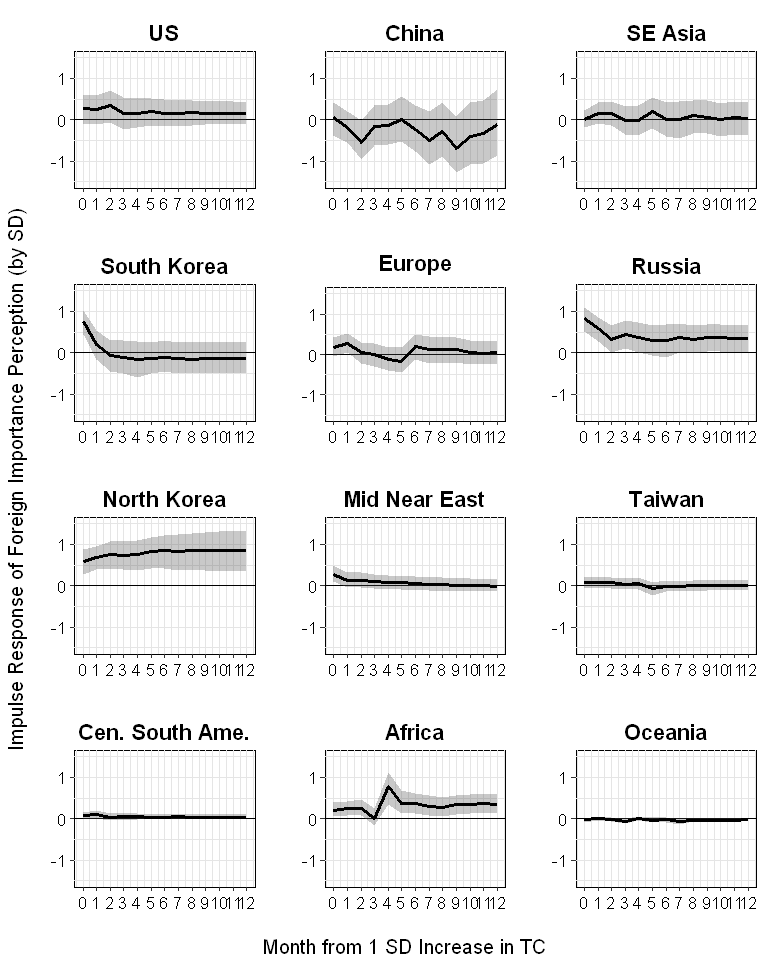

In [15]:
###########################
## Agenda-setting Effect ##
###########################

#syset <- scale_y_continuous(limits=c(-5.5,5.5),breaks=c(-5,-3,-1,1,3,5))
syset <- scale_y_continuous(limits=c(-1.5,1.5),breaks=c(-1,0,1))
px1 <- pirf(usimp,"imprel","statecount_w_both_per",usirf,3,"US") + syset
px2 <- pirf(chnimp,"imprel","statecount_w_both_per",chnirf,3,"China") + syset
px3 <- pirf(seasiaimp,"imprel","statecount_w_both_per",seasiairf,3,"SE Asia") + syset
px4 <- pirf(skorimp,"imprel","statecount_w_both_per",skorirf,3,"South Korea") + syset
px5 <- pirf(euroimp,"imprel","statecount_w_both_per",euroirf,3,"Europe") + syset
px6 <- pirf(rusimp,"imprel","statecount_w_both_per",rusirf,3,"Russia") + syset
px7 <- pirf(nkorimp,"imprel","statecount_w_both_per",nkorirf,3,"North Korea") + syset
px8 <- pirf(mneastimp,"imprel","statecount_w_both_per",mneastirf,3,"Mid Near East") + syset
px9 <- pirf(taiwanimp,"imprel","statecount_w_both_per",taiwanirf,3,"Taiwan") + syset
px10 <- pirf(msamericaimp,"imprel","statecount_w_both_per",msamericairf,3,"Cen. South Ame.") + syset
px11 <- pirf(africaimp,"imprel","statecount_w_both_per",africairf,3,"Africa") + syset
px12 <- pirf(oceaniaimp,"imprel","statecount_w_both_per",oceaniairf,3,"Oceania") + syset

px<-arrangeGrob(px1,px2,px3,px4,px5,px6,px7,px8,px9,px10,px11,px12,nrow=4,ncol=3,
                 left="Impulse Response of Foreign Importance Perception (by SD)",
                 bottom="Month from 1 SD Increase in TC")

options(repr.plot.width=6.5, repr.plot.height=8)
grid.arrange(px)


#### 4.2 Persuasion

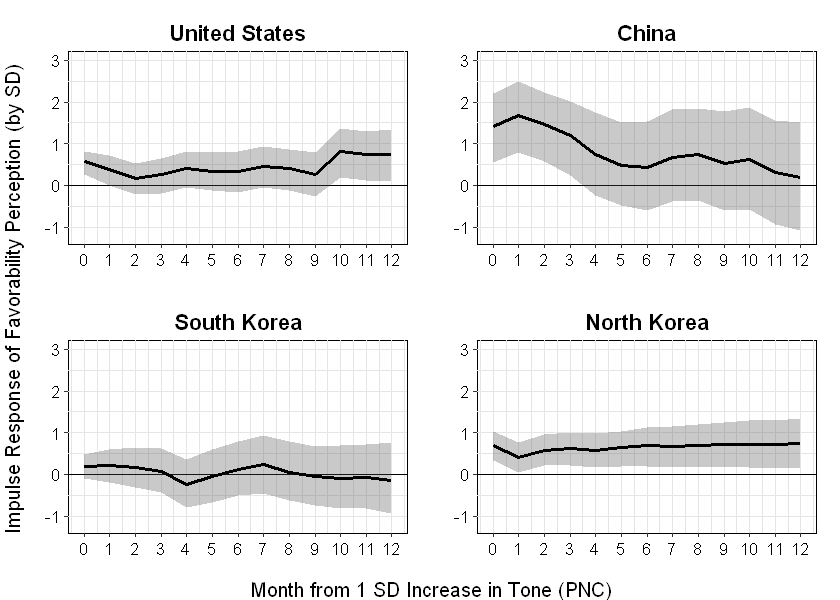

In [16]:
#######################
## Persuasion Effect ##
#######################

syset2 <- scale_y_continuous(limits=c(-1.2,3),breaks=c(-1,0,1,2,3))
py1 <- pirf(usldl,"ldlstate","statetone_w_both_per2",usirf_ldl,3,"United States") + syset2
py2 <- pirf(chnldl,"ldlstate","statetone_w_both_per2",chnirf_ldl,3,"China") + syset2
py3 <- pirf(skorldl,"ldlstate","statetone_w_both_per2",skorirf_ldl,3,"South Korea") + syset2
py4 <- pirf(nkorldl,"ldlstate","statetone_w_both_per2",nkorirf_ldl,3,"North Korea") + syset2

py<-arrangeGrob(py1,py2,py3,py4,nrow=2,ncol=2,
                 left="Impulse Response of Favorability Perception (by SD)",
                 bottom="Month from 1 SD Increase in Tone (PNC)")

options(repr.plot.width=7, repr.plot.height=5)
grid.arrange(py)


#### 4.3 Framing & Agenda-Setting

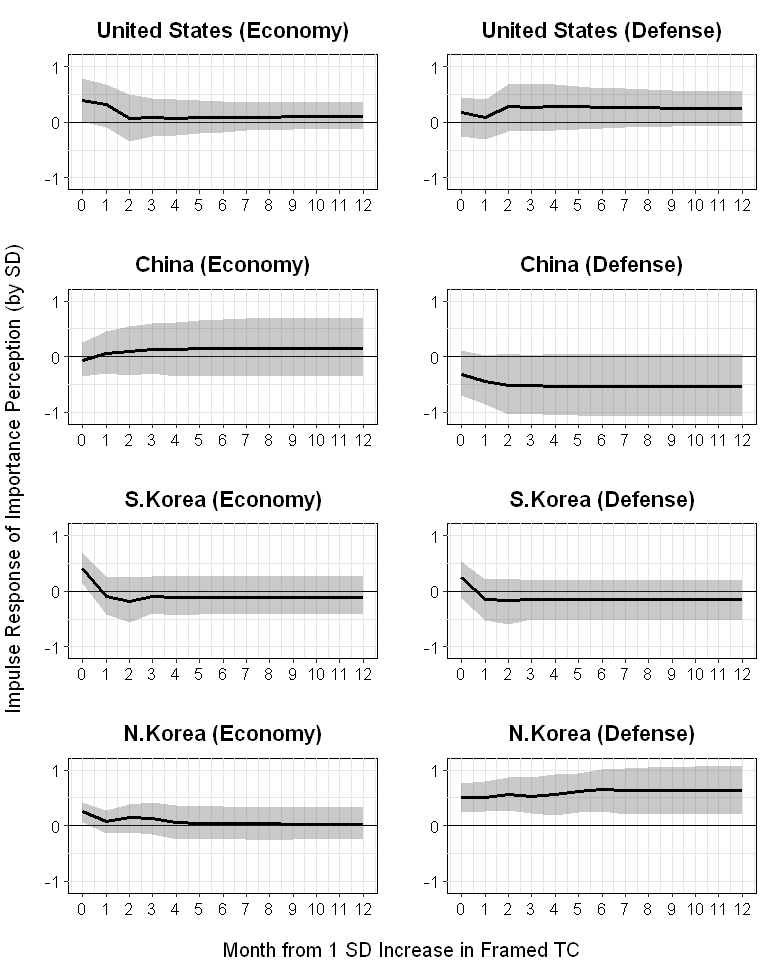

In [17]:
##############################
## Framing * Agenda-Setting ##
##############################

syset3 <- scale_y_continuous(limits=c(-1.1,1.1),breaks=c(-1,0,1))
pz1a <- pirf(usimp_frame,"imprel","econ_w_both_per2",usirf_frame,4,"United States (Economy)") + syset3
pz1b <- pirf(usimp_frame,"imprel","defense_w_both_per2",usirf_frame,4,"United States (Defense)") + syset3
pz2a <- pirf(chnimp_frame,"imprel","econ_w_both_per2",chnirf_frame,4,"China (Economy)") + syset3
pz2b <- pirf(chnimp_frame,"imprel","defense_w_both_per2",chnirf_frame,4,"China (Defense)") + syset3
pz3a <- pirf(skorimp_frame,"imprel","econ_w_both_per2",skorirf_frame,4,"S.Korea (Economy)") + syset3
pz3b <- pirf(skorimp_frame,"imprel","defense_w_both_per2",skorirf_frame,4,"S.Korea (Defense)") + syset3
pz4a <- pirf(nkorimp_frame,"imprel","econ_w_both_per2",nkorirf_frame,4,"N.Korea (Economy)") + syset3
pz4b <- pirf(nkorimp_frame,"imprel","defense_w_both_per2",nkorirf_frame,4,"N.Korea (Defense)") + syset3

pz<-arrangeGrob(pz1a,pz1b,pz2a,pz2b,pz3a,pz3b,pz4a,pz4b,nrow=4,ncol=2,
                left="Impulse Response of Importance Perception (by SD)",
                bottom="Month from 1 SD Increase in Framed TC")

options(repr.plot.width=6.5, repr.plot.height=8)
grid.arrange(pz)


#### 4.4 Framing & Persuasion

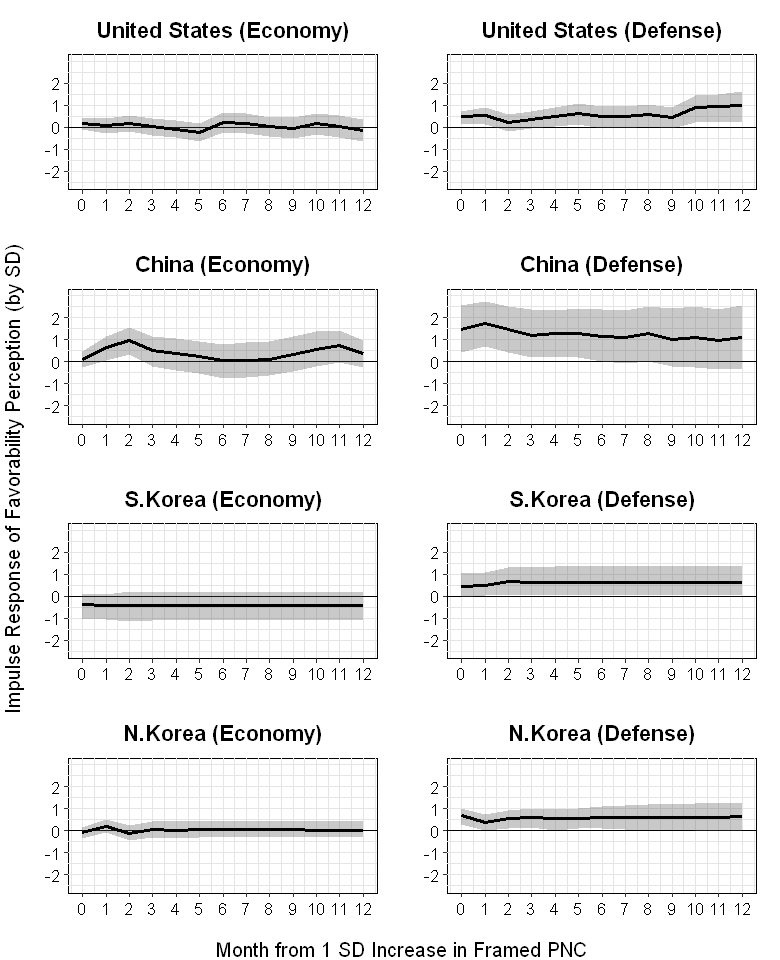

In [18]:
##########################
## Framing * Persuasion ##
##########################

syset3 <- scale_y_continuous(limits=c(-2.55,3),breaks=c(-2,-1,0,1,2))
pzz1a <- pirf(usldl_frame,"ldlstate","toneecon_w_both_per2",usirf_ldl_frame,4,"United States (Economy)") + syset3
pzz1b <- pirf(usldl_frame,"ldlstate","tonedefense_w_both_per2",usirf_ldl_frame,4,"United States (Defense)") + syset3
pzz2a <- pirf(chnldl_frame,"ldlstate","toneecon_w_both_per2",chnirf_ldl_frame,4,"China (Economy)") + syset3
pzz2b <- pirf(chnldl_frame,"ldlstate","tonedefense_w_both_per2",chnirf_ldl_frame,4,"China (Defense)") + syset3
pzz3a <- pirf(skorldl_frame,"ldlstate","toneecon_w_both_per2",skorirf_ldl_frame,4,"S.Korea (Economy)") + syset3
pzz3b <- pirf(skorldl_frame,"ldlstate","tonedefense_w_both_per2",skorirf_ldl_frame,4,"S.Korea (Defense)") + syset3
pzz4a <- pirf(nkorldl_frame,"ldlstate","toneecon_w_both_per2",nkorirf_ldl_frame,4,"N.Korea (Economy)") + syset3
pzz4b <- pirf(nkorldl_frame,"ldlstate","tonedefense_w_both_per2",nkorirf_ldl_frame,4,"N.Korea (Defense)") + syset3

pzz<-arrangeGrob(pzz1a,pzz1b,pzz2a,pzz2b,pzz3a,pzz3b,pzz4a,pzz4b,nrow=4,ncol=2,
                left="Impulse Response of Favorability Perception (by SD)",
                bottom="Month from 1 SD Increase in Framed PNC")

options(repr.plot.width=6.5, repr.plot.height=8)
grid.arrange(pzz)


#### 4.5 Framing & Persuasion by TC

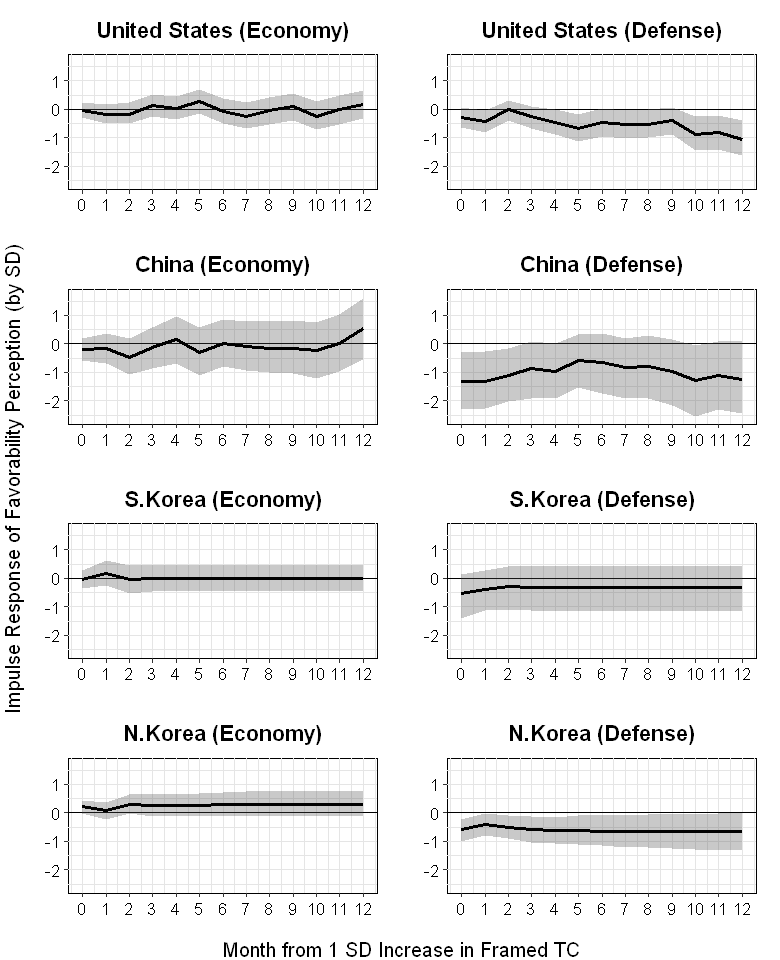

In [19]:
################################
## Framing * Persuasion by TC ##
################################

syset4 <- scale_y_continuous(limits=c(-2.6,1.7),breaks=c(-2,-1,0,1))
pzzz1a <- pirf(usldlI_frame,"ldlstate","econ_w_both_per2",usirf_ldlI_frame,4,"United States (Economy)") + syset4
pzzz1b <- pirf(usldlI_frame,"ldlstate","defense_w_both_per2",usirf_ldlI_frame,4,"United States (Defense)") + syset4
pzzz2a <- pirf(chnldlI_frame,"ldlstate","econ_w_both_per2",chnirf_ldlI_frame,4,"China (Economy)") + syset4
pzzz2b <- pirf(chnldlI_frame,"ldlstate","defense_w_both_per2",chnirf_ldlI_frame,4,"China (Defense)") + syset4
pzzz3a <- pirf(skorldlI_frame,"ldlstate","econ_w_both_per2",skorirf_ldlI_frame,4,"S.Korea (Economy)") + syset4
pzzz3b <- pirf(skorldlI_frame,"ldlstate","defense_w_both_per2",skorirf_ldlI_frame,4,"S.Korea (Defense)") + syset4
pzzz4a <- pirf(nkorldlI_frame,"ldlstate","econ_w_both_per2",nkorirf_ldlI_frame,4,"N.Korea (Economy)") + syset4
pzzz4b <- pirf(nkorldlI_frame,"ldlstate","defense_w_both_per2",nkorirf_ldlI_frame,4,"N.Korea (Defense)") + syset4

pzzz<-arrangeGrob(pzzz1a,pzzz1b,pzzz2a,pzzz2b,pzzz3a,pzzz3b,pzzz4a,pzzz4b,nrow=4,ncol=2,
                 left="Impulse Response of Favorability Perception (by SD)",
                 bottom="Month from 1 SD Increase in Framed TC")

options(repr.plot.width=6.5, repr.plot.height=8)
grid.arrange(pzzz)


### 5. Tables of IRF Results

#### 5.1 Agenda-Setting

In [20]:
##########################
## Table of IRF Results ##
##########################

####################
## Agenda Setting ##
####################

impirf<-rbind(round(usirf[[1]]$statecount_w_both_per[,3],1),
             ifelse(usirf[[2]]$statecount_w_both_per[,3] < 0 & 
                      usirf[[3]]$statecount_w_both_per[,3] > 0,"","*"),
             round(chnirf[[1]]$statecount_w_both_per[,3],1),
             ifelse(chnirf[[2]]$statecount_w_both_per[,3] < 0 & 
                      chnirf[[3]]$statecount_w_both_per[,3] > 0,"","*"),
             round(seasiairf[[1]]$statecount_w_both_per[,3],1),
             ifelse(seasiairf[[2]]$statecount_w_both_per[,3] < 0 & 
                      seasiairf[[3]]$statecount_w_both_per[,3] > 0,"","*"),
             round(skorirf[[1]]$statecount_w_both_per[,3],1),
             ifelse(skorirf[[2]]$statecount_w_both_per[,3] < 0 & 
                      skorirf[[3]]$statecount_w_both_per[,3] > 0,"","*"),
             round(euroirf[[1]]$statecount_w_both_per[,3],1),
             ifelse(euroirf[[2]]$statecount_w_both_per[,3] < 0 & 
                      euroirf[[3]]$statecount_w_both_per[,3] > 0,"","*"),
             round(rusirf[[1]]$statecount_w_both_per[,3],1),
             ifelse(rusirf[[2]]$statecount_w_both_per[,3] < 0 & 
                      rusirf[[3]]$statecount_w_both_per[,3] > 0,"","*"),
             round(nkorirf[[1]]$statecount_w_both_per[,3],1),
             ifelse(nkorirf[[2]]$statecount_w_both_per[,3] < 0 & 
                      nkorirf[[3]]$statecount_w_both_per[,3] > 0,"","*"),
             round(mneastirf[[1]]$statecount_w_both_per[,3],1),
             ifelse(mneastirf[[2]]$statecount_w_both_per[,3] < 0 & 
                      mneastirf[[3]]$statecount_w_both_per[,3] > 0,"","*"),
             round(taiwanirf[[1]]$statecount_w_both_per[,3],1),
             ifelse(taiwanirf[[2]]$statecount_w_both_per[,3] < 0 & 
                      taiwanirf[[3]]$statecount_w_both_per[,3] > 0,"","*"),
             round(msamericairf[[1]]$statecount_w_both_per[,3],1),
             ifelse(msamericairf[[2]]$statecount_w_both_per[,3] < 0 & 
                      msamericairf[[3]]$statecount_w_both_per[,3] > 0,"","*"),
             round(africairf[[1]]$statecount_w_both_per[,3],1),
             ifelse(africairf[[2]]$statecount_w_both_per[,3] < 0 & 
                      africairf[[3]]$statecount_w_both_per[,3] > 0,"","*"),
             round(oceaniairf[[1]]$statecount_w_both_per[,3],1),
             ifelse(oceaniairf[[2]]$statecount_w_both_per[,3] < 0 & 
                      oceaniairf[[3]]$statecount_w_both_per[,3] > 0,"","*")
             )
namestate<-c("US", "",
             "China", "",
             "S.E.Asia", "",
             "S.Korea", "",
             "Europe", "",
             "Russia", "",
             "N.Korea", "",
             "M.N.East", "",
             "Taiwan", "",
             "C.S.Ame.", "",
             "Africa", "",
             "Oceania", "")
komoku<-rep(c("Response","p<.05"),12)


impirftable<-data.frame(namestate,komoku,impirf)
colnames(impirftable)<-c("Country","",seq(0,12))

## Export Table-as-Figure ##
# print(xtable(impirftable, digits = 1,
#              caption="IRF Analysis Results Table (Agenda-Setting)"),
#       caption.placement = "top",booktab=TRUE,
#       include.rownames=FALSE)
xtable(impirftable, digits = 1,
             caption="IRF Analysis Results Table (Agenda-Setting)")


Country,,0,1,2,3,4,5,6,7,8,9,10,11,12
US,Response,0.3,0.3,0.3,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2
,p<.05,,,,,,,,,,,,,
China,Response,0,-0.2,-0.5,-0.2,-0.1,0,-0.2,-0.5,-0.3,-0.7,-0.4,-0.3,-0.1
,p<.05,,,*,,,,,,,,,,
S.E.Asia,Response,0,0.2,0.1,0,0,0.2,0,0,0.1,0.1,0,0.1,0
,p<.05,,,,,,,,,,,,,
S.Korea,Response,0.8,0.2,-0.1,-0.1,-0.2,-0.1,-0.1,-0.1,-0.1,-0.1,-0.1,-0.1,-0.1
,p<.05,*,,,,,,,,,,,,
Europe,Response,0.2,0.3,0,0,-0.1,-0.2,0.2,0.1,0.1,0.1,0,0,0.1
,p<.05,,*,,,,,,,,,,,


#### 5.2 Persuasion

In [21]:
################
## Persuasion ##
################

ldlirf<-rbind(round(usirf_ldl[[1]]$statetone_w_both_per2[,3],1),
                     ifelse(usirf_ldl[[2]]$statetone_w_both_per2[,3] < 0 & 
                              usirf_ldl[[3]]$statetone_w_both_per2[,3] > 0,"","*"),
                     round(chnirf_ldl[[1]]$statetone_w_both_per2[,3],1),
                     ifelse(chnirf_ldl[[2]]$statetone_w_both_per2[,3] < 0 & 
                              chnirf_ldl[[3]]$statetone_w_both_per2[,3] > 0,"","*"),
                     round(skorirf_ldl[[1]]$statetone_w_both_per2[,3],1),
                     ifelse(skorirf_ldl[[2]]$statetone_w_both_per2[,3] < 0 & 
                              skorirf_ldl[[3]]$statetone_w_both_per2[,3] > 0,"","*"),
                     round(nkorirf_ldl[[1]]$statetone_w_both_per2[,3],1),
                     ifelse(nkorirf_ldl[[2]]$statetone_w_both_per2[,3] < 0 & 
                              nkorirf_ldl[[3]]$statetone_w_both_per2[,3] > 0,"","*")
               )
namestate_ldl<-c("US", "",
             "China", "",
             "S.Korea", "",
             "N.Korea", "")
komoku_ldl<-rep(c("Response","p<.05"),4)


ldlirftable<-data.frame(namestate_ldl,komoku_ldl,ldlirf)
colnames(ldlirftable)<-c("Country","",seq(0,12))

## Export Table-as-Figure ##
# print(xtable(ldlirftable, digits = 1,
#              caption="IRF Analysis Results Table (Persuasion)"),
#       caption.placement = "top",booktab=TRUE,
#       include.rownames=FALSE)
xtable(ldlirftable, digits = 1,
             caption="IRF Analysis Results Table (Persuasion)")

Country,,0,1,2,3,4,5,6,7,8,9,10,11,12
US,Response,0.6,0.4,0.2,0.3,0.4,0.3,0.3,0.5,0.4,0.3,0.8,0.7,0.8
,p<.05,*,,,,,,,,,,*,*,*
China,Response,1.4,1.7,1.5,1.2,0.7,0.5,0.4,0.7,0.7,0.5,0.6,0.3,0.2
,p<.05,*,*,*,*,,,,,,,,,
S.Korea,Response,0.2,0.2,0.2,0.1,-0.3,0,0.1,0.2,0.1,-0.1,-0.1,-0.1,-0.1
,p<.05,,,,,,,,,,,,,
N.Korea,Response,0.7,0.4,0.6,0.6,0.6,0.6,0.7,0.7,0.7,0.7,0.7,0.7,0.7
,p<.05,*,*,*,*,*,*,*,*,*,*,*,*,*


#### 5.3 Framing & Agenda-Setting

In [22]:
##############################
## Framing * Agenda-Setting ##
##############################

impirf_frame<-rbind(round(usirf_frame[[1]]$econ_w_both_per[,4],1),
                     ifelse(usirf_frame[[2]]$econ_w_both_per[,4] < 0 & 
                              usirf_frame[[3]]$econ_w_both_per[,4] > 0,"","*"),
                     round(chnirf_frame[[1]]$econ_w_both_per[,4],1),
                     ifelse(chnirf_frame[[2]]$econ_w_both_per[,4] < 0 & 
                              chnirf_frame[[3]]$econ_w_both_per[,4] > 0,"","*"),
                     round(skorirf_frame[[1]]$econ_w_both_per[,4],1),
                     ifelse(skorirf_frame[[2]]$econ_w_both_per[,4] < 0 & 
                              skorirf_frame[[3]]$econ_w_both_per[,4] > 0,"","*"),
                     round(nkorirf_frame[[1]]$econ_w_both_per[,4],1),
                     ifelse(nkorirf_frame[[2]]$econ_w_both_per[,4] < 0 & 
                              nkorirf_frame[[3]]$econ_w_both_per[,4] > 0,"","*"),
                     round(usirf_frame[[1]]$defense_w_both_per[,4],1),
                     ifelse(usirf_frame[[2]]$defense_w_both_per[,4] < 0 & 
                              usirf_frame[[3]]$defense_w_both_per[,4] > 0,"","*"),
                     round(chnirf_frame[[1]]$defense_w_both_per[,4],1),
                     ifelse(chnirf_frame[[2]]$defense_w_both_per[,4] < 0 & 
                              chnirf_frame[[3]]$defense_w_both_per[,4] > 0,"","*"),
                     round(skorirf_frame[[1]]$defense_w_both_per[,4],1),
                     ifelse(skorirf_frame[[2]]$defense_w_both_per[,4] < 0 & 
                              skorirf_frame[[3]]$defense_w_both_per[,4] > 0,"","*"),
                     round(nkorirf_frame[[1]]$defense_w_both_per[,4],1),
                     ifelse(nkorirf_frame[[2]]$defense_w_both_per[,4] < 0 & 
                              nkorirf_frame[[3]]$defense_w_both_per[,4] > 0,"","*")
               )
namestate_frame<-c("US (Econ)", "",
             "China (Econ)", "",
             "S.Korea (Econ)", "",
             "N.Korea (Econ)", "",
             "USA (Def)", "",
             "China (Def)", "",
             "S.Korea (Def)", "",
             "N.Korea (Def)", "")
komoku_frame<-rep(c("Response","p<.05"),8)


impirftable_frame<-data.frame(namestate_frame,komoku_frame,impirf_frame)
colnames(impirftable_frame)<-c("Country","",seq(0,12))

## Export Table-as-Figure ##
# print(xtable(impirftable_frame, digits = 1,
#              caption="IRF Analysis Results Table (Agenda-Setting/Framing)"),
#       caption.placement = "top",booktab=TRUE,
#       include.rownames=FALSE)
xtable(impirftable_frame, digits = 1,
             caption="IRF Analysis Results Table (Agenda-Setting/Framing)")

Country,,0,1,2,3,4,5,6,7,8,9,10,11,12
US (Econ),Response,0.4,0.3,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
,p<.05,*,,,,,,,,,,,,
China (Econ),Response,-0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
,p<.05,,,,,,,,,,,,,
S.Korea (Econ),Response,0.4,-0.1,-0.2,-0.1,-0.1,-0.1,-0.1,-0.1,-0.1,-0.1,-0.1,-0.1,-0.1
,p<.05,*,,,,,,,,,,,,
N.Korea (Econ),Response,0.3,0.1,0.1,0.1,0.1,0,0,0,0,0,0,0,0
,p<.05,*,,,,,,,,,,,,
USA (Def),Response,0.2,0.1,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.2,0.2,0.2
,p<.05,,,,,,,,,,,,,


#### 5.4 Framing & Persuasion

In [23]:
##########################
## Framing * Persuasion ##
##########################

ldlirf_frame<-rbind(round(usirf_ldl_frame[[1]]$toneecon_w_both_per[,4],1),
                           ifelse(usirf_ldl_frame[[2]]$toneecon_w_both_per[,4] < 0 & 
                                    usirf_ldl_frame[[3]]$toneecon_w_both_per[,4] > 0,"","*"),
                           round(chnirf_ldl_frame[[1]]$toneecon_w_both_per[,4],1),
                           ifelse(chnirf_ldl_frame[[2]]$toneecon_w_both_per[,4] < 0 & 
                                    chnirf_ldl_frame[[3]]$toneecon_w_both_per[,4] > 0,"","*"),
                           round(skorirf_ldl_frame[[1]]$toneecon_w_both_per[,4],1),
                           ifelse(skorirf_ldl_frame[[2]]$toneecon_w_both_per[,4] < 0 & 
                                    skorirf_ldl_frame[[3]]$toneecon_w_both_per[,4] > 0,"","*"),
                           round(nkorirf_ldl_frame[[1]]$toneecon_w_both_per[,4],1),
                           ifelse(nkorirf_ldl_frame[[2]]$toneecon_w_both_per[,4] < 0 & 
                                    nkorirf_ldl_frame[[3]]$toneecon_w_both_per[,4] > 0,"","*"),
                           round(usirf_ldl_frame[[1]]$tonedefense_w_both_per[,4],1),
                           ifelse(usirf_ldl_frame[[2]]$tonedefense_w_both_per[,4] < 0 & 
                                    usirf_ldl_frame[[3]]$tonedefense_w_both_per[,4] > 0,"","*"),
                           round(chnirf_ldl_frame[[1]]$tonedefense_w_both_per[,4],1),
                           ifelse(chnirf_ldl_frame[[2]]$tonedefense_w_both_per[,4] < 0 & 
                                    chnirf_ldl_frame[[3]]$tonedefense_w_both_per[,4] > 0,"","*"),
                           round(skorirf_ldl_frame[[1]]$tonedefense_w_both_per[,4],1),
                           ifelse(skorirf_ldl_frame[[2]]$tonedefense_w_both_per[,4] < 0 & 
                                    skorirf_ldl_frame[[3]]$tonedefense_w_both_per[,4] > 0,"","*"),
                           round(nkorirf_ldl_frame[[1]]$tonedefense_w_both_per[,4],1),
                           ifelse(nkorirf_ldl_frame[[2]]$tonedefense_w_both_per[,4] < 0 & 
                                    nkorirf_ldl_frame[[3]]$tonedefense_w_both_per[,4] > 0,"","*")
                     )
namestate_ldl_frame<-c("US (Econ)", "",
                   "China (Econ)", "",
                   "S.Korea (Econ)", "",
                   "N.Korea (Econ)", "",
                   "USA (Def)", "",
                   "China (Def)", "",
                   "S.Korea (Def)", "",
                   "N.Korea (Def)", "")
komoku_ldl_frame<-rep(c("Response","p<.05"),8)


ldlirftable_frame<-data.frame(namestate_ldl_frame,komoku_ldl_frame,ldlirf_frame)
colnames(ldlirftable_frame)<-c("Country","",seq(0,12))

## Export Table-as-Figure ##
# print(xtable(ldlirftable_frame, digits = 1,
#              caption="IRF Analysis Results Table (Persuasion/Framing)"),
#       caption.placement = "top",booktab=TRUE,
#       include.rownames=FALSE)
xtable(ldlirftable_frame, digits = 1,
             caption="IRF Analysis Results Table (Persuasion/Framing)")

Country,,0,1,2,3,4,5,6,7,8,9,10,11,12
US (Econ),Response,0.2,0.1,0.2,0,-0.1,-0.2,0.2,0.2,0,0,0.2,0,-0.1
,p<.05,,,,,,,,,,,,,
China (Econ),Response,0.1,0.6,1,0.5,0.4,0.2,0,0.1,0.1,0.3,0.6,0.7,0.4
,p<.05,,*,*,,,,,,,,,,
S.Korea (Econ),Response,-0.4,-0.4,-0.4,-0.4,-0.4,-0.4,-0.4,-0.4,-0.4,-0.4,-0.4,-0.4,-0.4
,p<.05,,,,,,,,,,,,,
N.Korea (Econ),Response,-0.1,0.2,-0.1,0.1,0,0,0,0,0,0,0,0,0
,p<.05,,,,,,,,,,,,,
USA (Def),Response,0.5,0.5,0.2,0.4,0.5,0.6,0.5,0.5,0.6,0.4,0.9,0.9,1
,p<.05,*,*,,,*,*,,,*,,*,*,*


#### 5.5 Framing & Persuasion by TC

In [24]:
################################
## Framing * Persuasion by TC ##
################################

ldlIirf_frame<-rbind(round(usirf_ldlI_frame[[1]]$econ_w_both_per[,4],1),
                    ifelse(usirf_ldlI_frame[[2]]$econ_w_both_per[,4] < 0 & 
                             usirf_ldlI_frame[[3]]$econ_w_both_per[,4] > 0,"","*"),
                    round(chnirf_ldlI_frame[[1]]$econ_w_both_per[,4],1),
                    ifelse(chnirf_ldlI_frame[[2]]$econ_w_both_per[,4] < 0 & 
                             chnirf_ldlI_frame[[3]]$econ_w_both_per[,4] > 0,"","*"),
                    round(skorirf_ldlI_frame[[1]]$econ_w_both_per[,4],1),
                    ifelse(skorirf_ldlI_frame[[2]]$econ_w_both_per[,4] < 0 & 
                             skorirf_ldlI_frame[[3]]$econ_w_both_per[,4] > 0,"","*"),
                    round(nkorirf_ldlI_frame[[1]]$econ_w_both_per[,4],1),
                    ifelse(nkorirf_ldlI_frame[[2]]$econ_w_both_per[,4] < 0 & 
                             nkorirf_ldlI_frame[[3]]$econ_w_both_per[,4] > 0,"","*"),
                    round(usirf_ldlI_frame[[1]]$defense_w_both_per[,4],1),
                    ifelse(usirf_ldlI_frame[[2]]$defense_w_both_per[,4] < 0 & 
                             usirf_ldlI_frame[[3]]$defense_w_both_per[,4] > 0,"","*"),
                    round(chnirf_ldlI_frame[[1]]$defense_w_both_per[,4],1),
                    ifelse(chnirf_ldlI_frame[[2]]$defense_w_both_per[,4] < 0 & 
                             chnirf_ldlI_frame[[3]]$defense_w_both_per[,4] > 0,"","*"),
                    round(skorirf_ldlI_frame[[1]]$defense_w_both_per[,4],1),
                    ifelse(skorirf_ldlI_frame[[2]]$defense_w_both_per[,4] < 0 & 
                             skorirf_ldlI_frame[[3]]$defense_w_both_per[,4] > 0,"","*"),
                    round(nkorirf_ldlI_frame[[1]]$defense_w_both_per[,4],1),
                    ifelse(nkorirf_ldlI_frame[[2]]$defense_w_both_per[,4] < 0 & 
                             nkorirf_ldlI_frame[[3]]$defense_w_both_per[,4] > 0,"","*")
)
namestate_ldlI_frame<-c("US (Econ)", "",
                       "China (Econ)", "",
                       "S.Korea (Econ)", "",
                       "N.Korea (Econ)", "",
                       "USA (Def)", "",
                       "China (Def)", "",
                       "S.Korea (Def)", "",
                       "N.Korea (Def)", "")
komoku_ldlI_frame<-rep(c("Response","p<.05"),8)


ldlIirftable_frame<-data.frame(namestate_ldlI_frame,komoku_ldlI_frame,ldlIirf_frame)
colnames(ldlIirftable_frame)<-c("Country","",seq(0,12))

## Export Table-as-Figure ##
# print(xtable(ldlIirftable_frame, digits = 1,
#              caption="IRF Analysis Results Table (TC-Persuasion/Framing)"),
#       caption.placement = "top",booktab=TRUE,
#       include.rownames=FALSE)
xtable(ldlIirftable_frame, digits = 1,
             caption="IRF Analysis Results Table (TC-Persuasion/Framing)")

Country,,0,1,2,3,4,5,6,7,8,9,10,11,12
US (Econ),Response,0,-0.2,-0.2,0.1,0,0.3,-0.1,-0.2,0,0.1,-0.3,0,0.2
,p<.05,,,,,,,,,,,,,
China (Econ),Response,-0.2,-0.2,-0.5,-0.1,0.2,-0.3,0,-0.1,-0.2,-0.2,-0.2,0,0.5
,p<.05,,,,,,,,,,,,,
S.Korea (Econ),Response,0,0.2,0,0,0,0,0,0,0,0,0,0,0
,p<.05,,,,,,,,,,,,,
N.Korea (Econ),Response,0.2,0.1,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3
,p<.05,,,,,,,,,,,,,
USA (Def),Response,-0.3,-0.4,0,-0.3,-0.4,-0.7,-0.5,-0.5,-0.5,-0.4,-0.9,-0.8,-1.1
,p<.05,,*,,,*,*,,*,*,,*,*,*


### 6. Save Results

All Figures are saved to <code>outputs</code> directory by the name of <code>v3_Figure_TimeSeries.RData</code>.

In [25]:
#################
## Save Result ##
#################

save.image("./outputs/v3_Figure_TimeSeries.RData")
